# Load Libs🚀

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
import math

# Data Cleaning📑

In [2]:
path = '../data/Phenotype_Master21_22.xlsx'
data_A = pd.read_excel(path, sheet_name='A', index_col=0)
data_B = pd.read_excel(path, sheet_name='B', index_col=0)
data_C = pd.read_excel(path, sheet_name='C', index_col=0)

data_A = data_A.dropna(subset=['PLO'])  
data_B = data_B.dropna(subset=['PLO']) 
data_C = data_C.dropna(subset=['PLO']) 

# missing as median of column
data_A.fillna(data_A.median(), inplace=True)
data_B.fillna(data_B.median(), inplace=True)
data_C.fillna(data_C.median(), inplace=True)

# last column is ploidy
features_A = data_A.iloc[:,:-1]
class_labels_A = data_A.iloc[:,-1].astype(str) 
features_B = data_B.iloc[:,:-1]
class_labels_B = data_B.iloc[:,-1].astype(str) 
features_C = data_C.iloc[:,:-1]
class_labels_C = data_C.iloc[:,-1].astype(str) 

# Check different traits situation in different ploidy📈

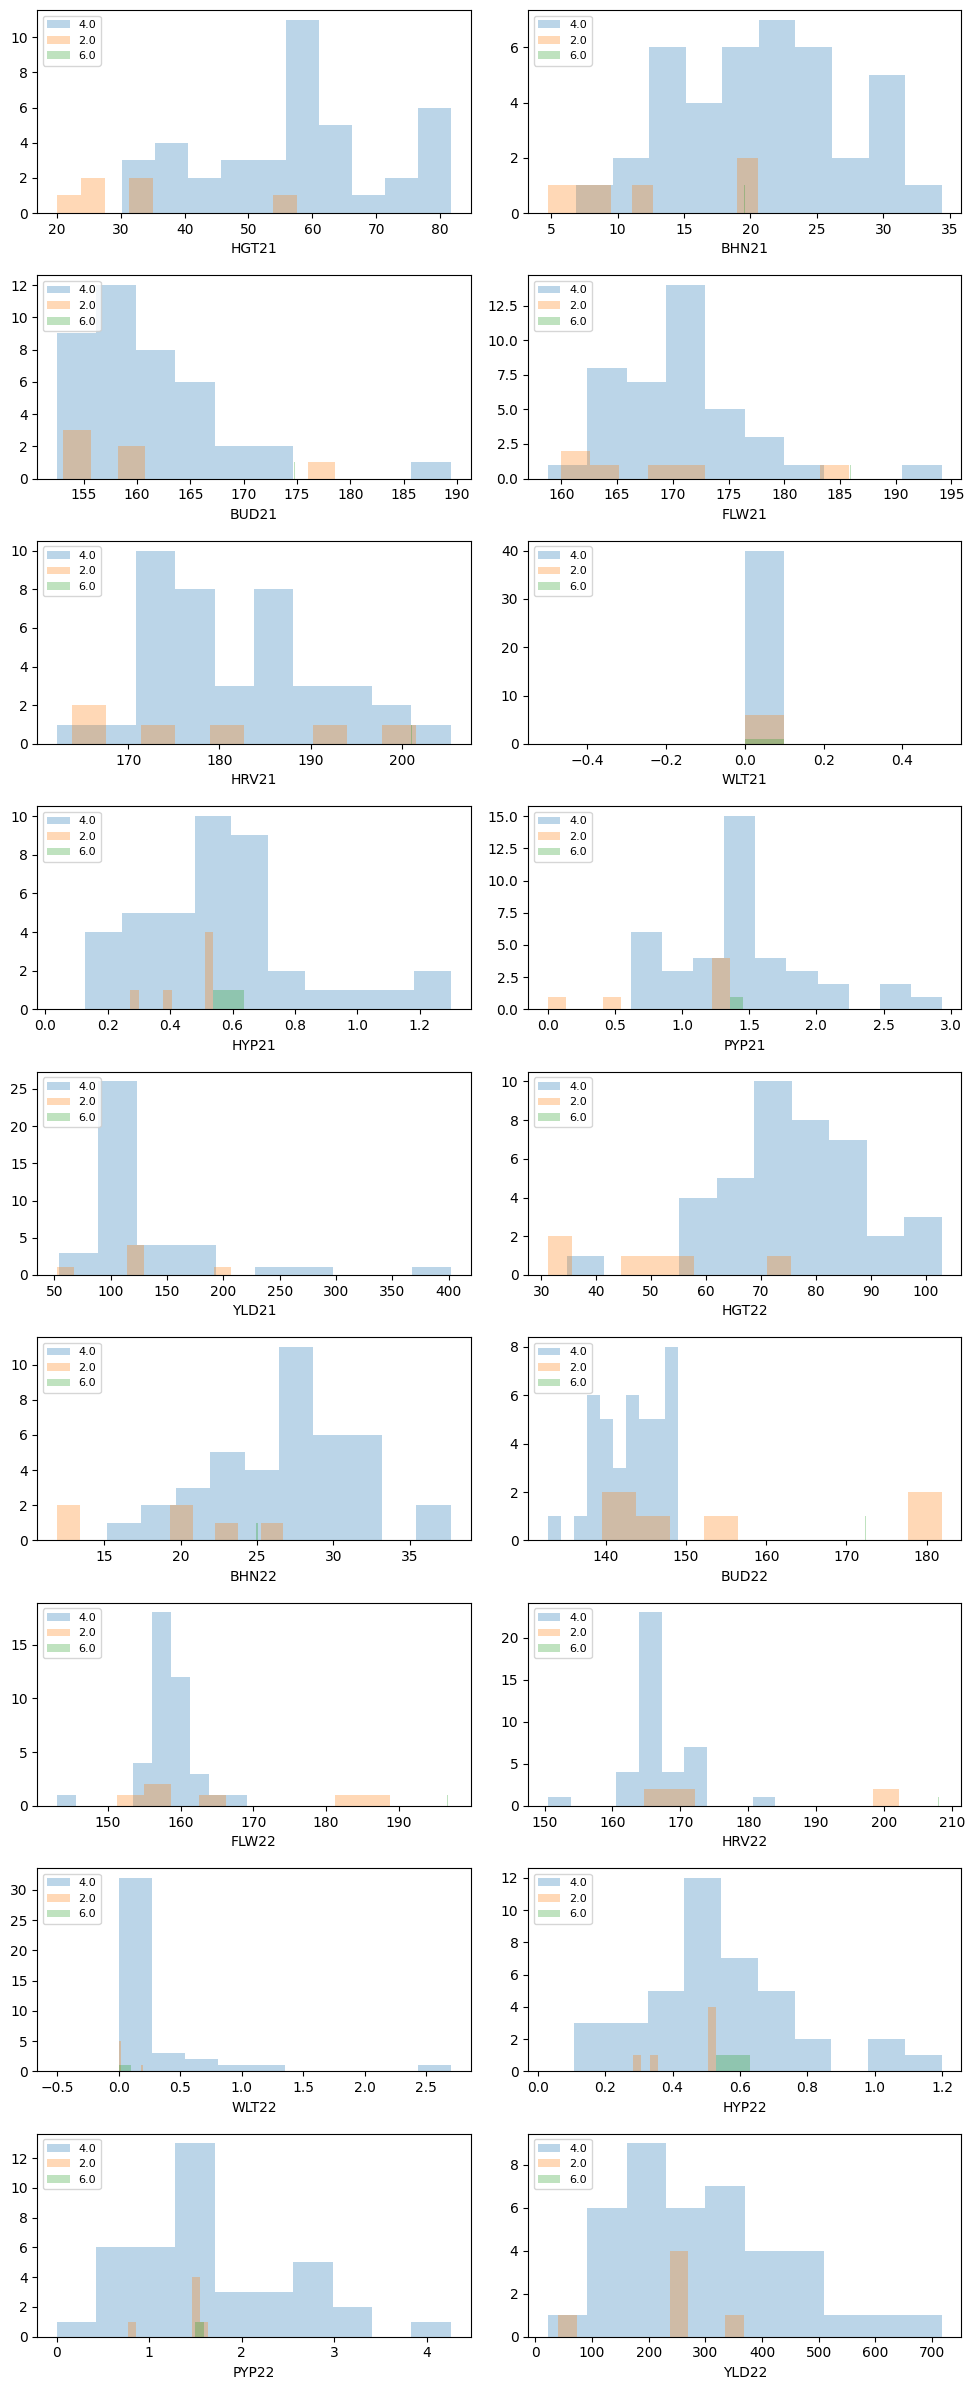

In [3]:
plt.figure(figsize=(10, 24))
# iter cols
for i, col in enumerate(features_A.columns):
    plt.subplot(math.ceil(len(features_A.columns) / 2), 2, i+1)  
    for label in class_labels_A.unique():
        plt.hist(features_A.loc[class_labels_A == label, col], label=label, bins=10, alpha=0.3)
    plt.xlabel(col)
    plt.legend(loc='upper left', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

# Sort PCA, prepare top 3 PCA since later we found out top 3 has big influence🎱

In [4]:
scalar = StandardScaler()
scaled_A = pd.DataFrame(scalar.fit_transform(features_A))
scaled_B = pd.DataFrame(scalar.fit_transform(features_B))
scaled_C = pd.DataFrame(scalar.fit_transform(features_C))

pca = PCA(n_components = 3)
pca.fit(scaled_A)
pca.fit(scaled_B)
pca.fit(scaled_C)

A_pca = pca.transform(scaled_A)
B_pca = pca.transform(scaled_B)
C_pca = pca.transform(scaled_C)

A_pca = pd.DataFrame(A_pca,columns=['PC1','PC2','PC3'])
B_pca = pd.DataFrame(B_pca,columns=['PC1','PC2','PC3'])
C_pca = pd.DataFrame(C_pca,columns=['PC1','PC2','PC3'])
#C_pca.head()

# Covariance matrix method💻

In [5]:
##Detailed Style
mean_vec = np.mean(scaled_A, axis=0) # get maen
cov_mat = (scaled_A - mean_vec).T.dot((scaled_A - mean_vec)) / (scaled_A.shape[0]-1) # get covariance matrix
print('Covariance matrix \n%s' %cov_mat) 

##Ez style
#print('NumPy covariance matrix: \n%s' %np.cov(scaled_A.T))

Covariance matrix 
          0         1         2         3         4    5         6         7   \
0   1.021739  0.854868 -0.432679 -0.389418 -0.420841  0.0  0.031761  0.062094   
1   0.854868  1.021739 -0.296843 -0.245711 -0.261865  0.0  0.108909  0.107983   
2  -0.432679 -0.296843  1.021739  0.983316  0.881253  0.0  0.079572  0.075176   
3  -0.389418 -0.245711  0.983316  1.021739  0.921906  0.0  0.120152  0.132001   
4  -0.420841 -0.261865  0.881253  0.921906  1.021739  0.0  0.106269  0.231527   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
6   0.031761  0.108909  0.079572  0.120152  0.106269  0.0  1.021739  0.456694   
7   0.062094  0.107983  0.075176  0.132001  0.231527  0.0  0.456694  1.021739   
8   0.448278  0.429703 -0.220436 -0.171623 -0.211375  0.0  0.183217  0.030268   
9   0.759092  0.776702 -0.097511 -0.016831 -0.063500  0.0  0.169007  0.237233   
10  0.540087  0.526296  0.040776  0.099957  0.072839  0.0  0.171112  0.279632   
11 -0.195

# Calculate eigenvalues and eigenvectors, folded in half by diagonal📰 

In [6]:
cov_mat = np.cov(scaled_A.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 3.65559847e-01  2.21998999e-01 -1.82538743e-01  5.14458346e-03
   9.67039010e-02  1.28452137e-01  5.24280418e-02  6.12183882e-02
   2.98270948e-01 -2.21128608e-01  5.41973249e-01 -9.17781250e-02
   4.09603742e-02  6.85487875e-02 -1.49535717e-01  2.29239535e-01
  -4.79664015e-01  0.00000000e+00]
 [ 3.07592101e-01  2.80660799e-01 -1.49936081e-01  2.95921044e-02
   1.38354107e-01  2.74187046e-01  1.45870337e-01  3.98434578e-01
   6.81682611e-02 -2.41575759e-01 -6.90154491e-02  3.45626625e-02
   6.00853063e-02 -6.96903980e-02 -1.26867820e-01 -8.13841181e-02
   6.54799319e-01  0.00000000e+00]
 [-3.33334723e-01  2.23872446e-01  8.62642827e-02  3.51561929e-01
   1.90004108e-02 -1.38778816e-01  1.92082256e-01  5.79850068e-03
   4.58434514e-02 -1.71163942e-01  3.37132428e-01 -1.38095357e-01
  -5.77714108e-01  9.16066983e-02  1.01512889e-01 -3.56842584e-01
   8.52513395e-02  0.00000000e+00]
 [-3.23940747e-01  2.75348373e-01  8.92527164e-02  3.35965354e-01
   3.55333874e-02 -1.26

# Match the eigenvalues to the eigenvectors one-by-one, first row to the first and the second row corresponding to the second...📐

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('----------')
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(4.641238295048938, array([ 0.36555985,  0.3075921 , -0.33333472, -0.32394075, -0.33433508,
        0.        ,  0.04072252,  0.05481286,  0.23021105,  0.27874095,
        0.18076607, -0.28958486, -0.27017424, -0.23672607,  0.12427512,
        0.01308116, -0.08780182,  0.19918181])), (3.068982838193489, array([ 0.221999  ,  0.2806608 ,  0.22387245,  0.27534837,  0.26435736,
        0.        ,  0.28128378,  0.24108661,  0.10867474,  0.38974262,
        0.39212458,  0.183151  ,  0.24508135,  0.21314971, -0.05581366,
        0.20480858,  0.0713752 ,  0.17947967])), (3.0250828336358246, array([-0.18253874, -0.14993608,  0.08626428,  0.08925272,  0.08520381,
        0.        ,  0.39426979,  0.28772367, -0.0438622 , -0.09312055,
       -0.05617945, -0.30006276, -0.32725781, -0.35283033, -0.04646302,
        0.41779284,  0.41128761, -0.04532914])), (1.9285294929180605, array([ 0.00514458,  0.0295921 ,  0.35156193,  0.33596535,  0.29782269,
        0.        , -0.26301924,  0.04183523,  0.0

# turn results to percentage✒️

In [8]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print (var_exp)
cum_var_exp = np.cumsum(var_exp, dtype=list) # calculate the cumulative value
cum_var_exp

[26.72052084759085, 17.668737241164, 17.415996288766934, 11.102923238326746, 7.416160088558706, 5.181134955850309, 4.088381880554831, 3.7046022804946523, 2.0260367453318424, 1.6871450019076646, 0.8630343013397296, 0.6434548884577559, 0.5300035249790899, 0.48770706848139206, 0.2618974694350407, 0.13384394286502724, 0.06842023589545349, 0.0]


array([26.72052084759085, 44.38925808875485, 61.805254377521784,
       72.90817761584853, 80.32433770440724, 85.50547266025755,
       89.59385454081239, 93.29845682130704, 95.32449356663888,
       97.01163856854654, 97.87467286988627, 98.51812775834402,
       99.04813128332312, 99.53583835180451, 99.79773582123956,
       99.93157976410458, 100.00000000000004, 100.00000000000004],
      dtype=object)

# Visualize how much each feature value occupies💎

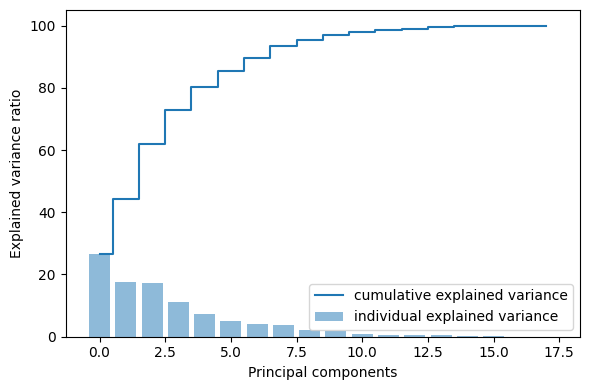

In [9]:
plt.figure(figsize=(6, 4))

plt.bar(range(18), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(18), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# get top 2♦️

In [10]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(18,1),
                      eig_pairs[1][1].reshape(18,1)))

print('Matrix W:\n', matrix_w)

#计算
Y = scaled_A.dot(matrix_w)
Y


Matrix W:
 [[ 0.36555985  0.221999  ]
 [ 0.3075921   0.2806608 ]
 [-0.33333472  0.22387245]
 [-0.32394075  0.27534837]
 [-0.33433508  0.26435736]
 [ 0.          0.        ]
 [ 0.04072252  0.28128378]
 [ 0.05481286  0.24108661]
 [ 0.23021105  0.10867474]
 [ 0.27874095  0.38974262]
 [ 0.18076607  0.39212458]
 [-0.28958486  0.183151  ]
 [-0.27017424  0.24508135]
 [-0.23672607  0.21314971]
 [ 0.12427512 -0.05581366]
 [ 0.01308116  0.20480858]
 [-0.08780182  0.0713752 ]
 [ 0.19918181  0.17947967]]


,0,1
0,1.922852,0.318341
1,-2.172019,-0.089514
2,-4.579382,0.984789
3,-5.159440,3.723526
4,-0.446525,-0.676431
5,-2.703264,-0.866528
6,-2.039708,0.381721
7,-1.024204,-4.307371
8,2.790461,-0.107223
9,-2.727728,-0.745162


# Visulization 2D 3D🎳

In [11]:
A_pca['label'] = class_labels_A.values  
colors = ['red', 'green', 'blue']
labels = class_labels_A.unique()
#labels

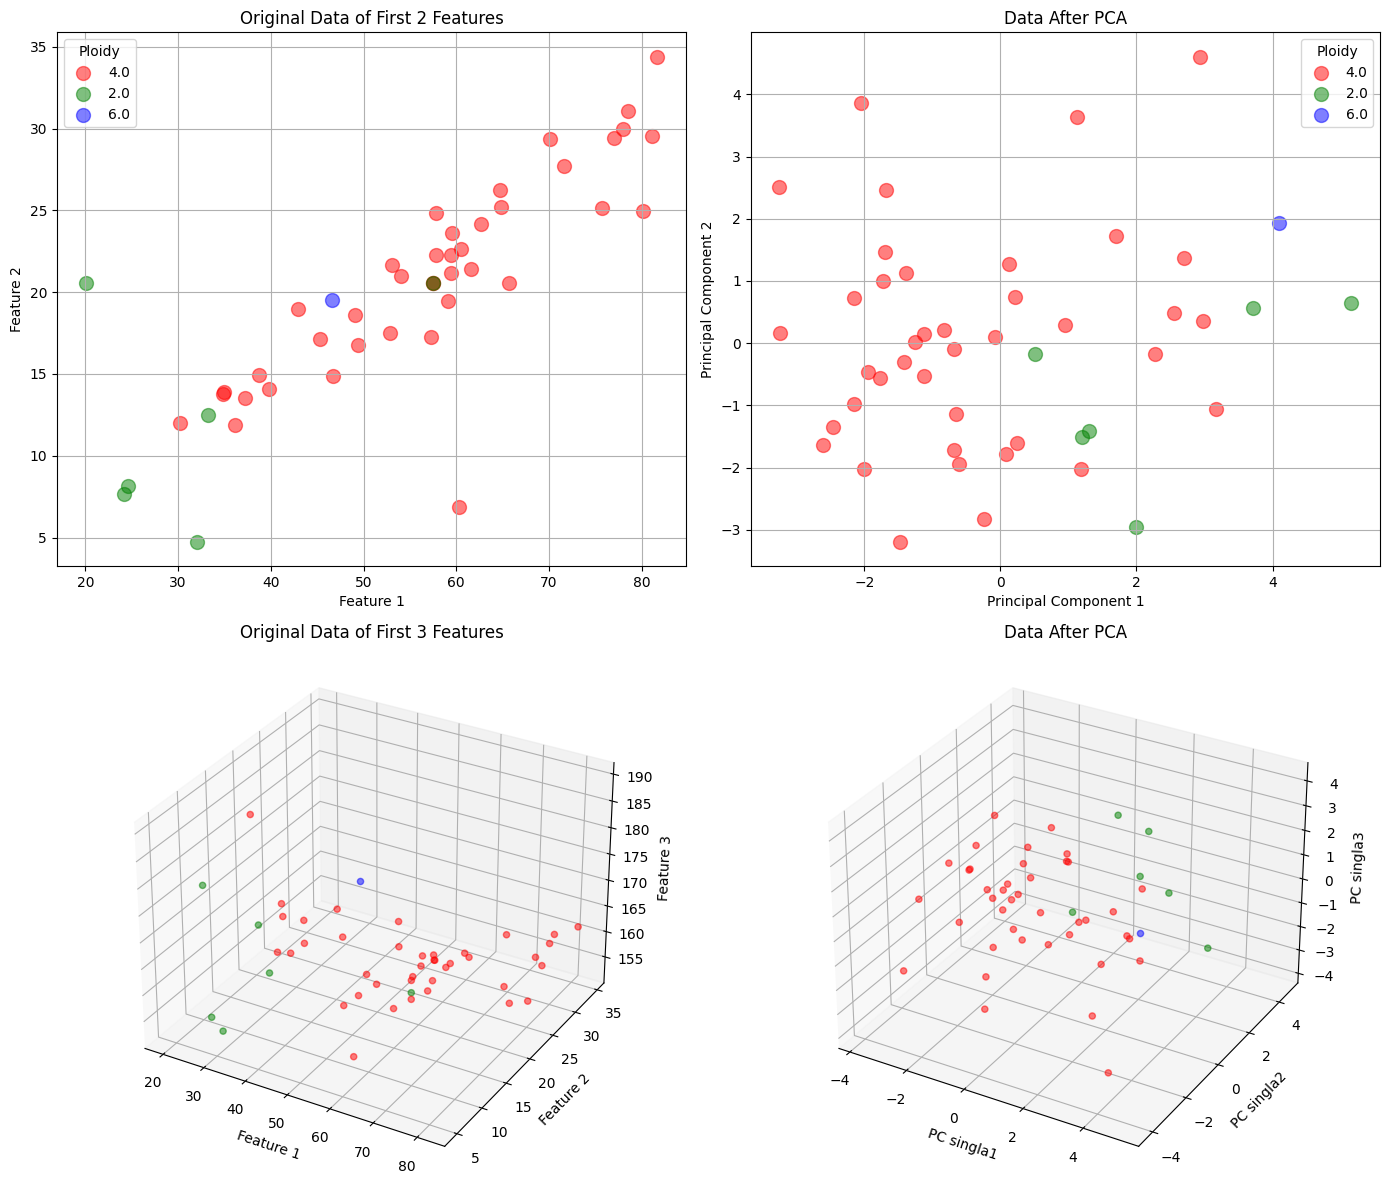

In [12]:

fig = plt.figure(figsize=(14, 12))

# 2D Plot before PCA
ax1 = fig.add_subplot(221)
for color, label in zip(colors, labels):
    subset = features_A[class_labels_A == label]
    ax1.scatter(subset.iloc[:, 0], subset.iloc[:, 1], s=100, c=color, label=str(label), alpha=0.5)
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Original Data of First 2 Features')
ax1.legend(title='Ploidy')
ax1.grid(True)

# 2D Plot after PCA
ax2 = fig.add_subplot(222)
for color, label in zip(colors, labels):
    subset = A_pca[A_pca['label'] == label]
    ax2.scatter(subset['PC1'], subset['PC2'], s=100, c=color, label=str(label), alpha=0.5)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Data After PCA')
ax2.legend(title='Ploidy')
ax2.grid(True)

# 3D Plot before PCA
ax3 = fig.add_subplot(223, projection='3d')
for color, label in zip(colors, labels):
    subset = features_A[class_labels_A == label]
    ax3.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2], c=color, label=str(label), alpha=0.5)
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Feature 3')
ax3.set_title('Original Data of First 3 Features')

# 3D Plot after PCA
ax4 = fig.add_subplot(224, projection='3d')
pca_3d = PCA(n_components=3)  # We apply PCA for 3 components for 3D plotting
pca_3d.fit(scaled_A)
A_pca_3d = pd.DataFrame(pca_3d.transform(scaled_A), columns=['PC1', 'PC2', 'PC3'])
A_pca_3d['label'] = class_labels_A.values
for color, label in zip(colors, labels):
    subset = A_pca_3d[A_pca_3d['label'] == label]
    ax4.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=str(label), alpha=0.5)
ax4.set_xlabel('PC singla1')
ax4.set_ylabel('PC singla2')
ax4.set_zlabel('PC singla3')
ax4.set_title('Data After PCA')

plt.tight_layout()
fig.savefig('../images/result.png')
plt.show()